**Done in collaoration with Aaptha BV, Aryan Sharma, Ankith BV**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow as tf
from google.colab.patches import cv2_imshow

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls gdrive/MyDrive

'[Anime Time] Kimetsu no Yaiba - Demon Slayer - Mugen Train (2020) [1080p][PSN][Dual Audio][HEVC 10bit x265][Eng Sub].mkv'
 Datasets
'MatlabProject_ImageRestoration (1).pdf'
'MatlabProject_ImageRestoration (2).pdf'
 MatlabProject_ImageRestoration.pdf
 PES2UG19CS068_C.c
 PES2UG19CS068_H.h
 PES2UG19CS068_S.c


In [ ]:
!unzip gdrive/MyDrive/MD.zip

unzip:  cannot find or open gdrive/MyDrive/MD.zip, gdrive/MyDrive/MD.zip.zip or gdrive/MyDrive/MD.zip.ZIP.


In [ ]:
directory = '/content'
choice = ['with_mask', 'without_mask']
dataset = []
img_size = 224

for i in choice:
  #Contains the path of the folder along with each of the image containing folder.
  path_new = os.path.join(directory, i)
  label = choice.index(i)   #Takes 0 as covid and 1 as normal
  print(path_new)
  for image in os.listdir(path_new):
    image_array = cv2.imread(os.path.join(path_new,image), 0)
    dataset.append([cv2.resize(image_array, (img_size,img_size)), label])

/content/with_mask
/content/without_mask


Let us check if we can see the images.

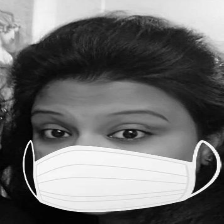

In [ ]:
cv2_imshow(dataset[0][0])

Let us check the size of the image by using shape command.

In [ ]:
np.shape(dataset[0][0])

(224, 224)

Let us check the number of rows in the dataset.

In [ ]:
len(dataset)

1376

**Now let us make train and test sets.**

In [ ]:
x_train = []
y_train = []

for feature, label in dataset:
  x_train.append(feature)
  y_train.append(label)

# Normalize the data
x_train = np.array(x_train)/ 255
y_train = np.array(y_train)
x_train = x_train.reshape(x_train.shape[0], img_size, img_size, 1)

**Making the model**

In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(img_size,img_size,1)))
model.add(MaxPool2D())
model.add(Dropout(0.1))

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)       

In [ ]:
#opt = Adam(lr=0.000001)
opt = tf.keras.optimizers.SGD(lr=0.01)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 15 , validation_split=0.2)

Epoch 1/15
35/35 [==============================] - 62s 2s/step - loss: 0.6577 - accuracy: 0.6070 - val_loss: 0.8636 - val_accuracy: 0.0399
Epoch 2/15
35/35 [==============================] - 62s 2s/step - loss: 0.6005 - accuracy: 0.6647 - val_loss: 0.8282 - val_accuracy: 0.3080
Epoch 3/15
35/35 [==============================] - 62s 2s/step - loss: 0.5210 - accuracy: 0.7308 - val_loss: 0.7487 - val_accuracy: 0.5145
Epoch 4/15
35/35 [==============================] - 61s 2s/step - loss: 0.4913 - accuracy: 0.7490 - val_loss: 0.5750 - val_accuracy: 0.6884
Epoch 5/15
35/35 [==============================] - 62s 2s/step - loss: 0.4198 - accuracy: 0.7926 - val_loss: 0.5784 - val_accuracy: 0.7101
Epoch 6/15
35/35 [==============================] - 61s 2s/step - loss: 0.3283 - accuracy: 0.8527 - val_loss: 0.4224 - val_accuracy: 0.8297
Epoch 7/15
35/35 [==============================] - 61s 2s/step - loss: 0.3062 - accuracy: 0.8777 - val_loss: 0.2409 - val_accuracy: 0.9746
Epoch 8/15
35/35 [==

**As you can see, we have achieved an accuracy of 95%**